In [10]:
import numpy as np
import pandas as pd
import os
from scipy import stats
np.random.seed(42)
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
HOUSING_DATA = r"C:\Users\hcars\ML\housing.csv"
attrib = ["CRIM", "ZN","INDUS", "CHAS", "NOX", "RM",
                                             "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
def load_data(housing_path = HOUSING_DATA):
    return pd.read_csv(housing_path, delim_whitespace = True, names = attrib);
housing = load_data()
housing = housing.drop("B", axis  = 1)
z = np.abs(stats.zscore(housing))
one_rows = housing.loc[housing["CHAS"] == 1].copy()
housing = housing[(z < 3).all(axis = 1)]
housing = housing.append(one_rows)
# want to figure out how to remove all outliers except chas
housing.head()
#housing.hist(bins=75, figsize=(20,15))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,5.33,36.2


In [11]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471 entries, 0 to 372
Data columns (total 13 columns):
CRIM       471 non-null float64
ZN         471 non-null float64
INDUS      471 non-null float64
CHAS       471 non-null int64
NOX        471 non-null float64
RM         471 non-null float64
AGE        471 non-null float64
DIS        471 non-null float64
RAD        471 non-null int64
TAX        471 non-null float64
PTRATIO    471 non-null float64
LSTAT      471 non-null float64
MEDV       471 non-null float64
dtypes: float64(11), int64(2)
memory usage: 51.5 KB


In [12]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000
mean,2.744199,9.033970,11.273992,0.074310,0.556139,6.288344,69.071125,3.715152,9.373673,404.823779,18.474098,12.593631,22.345011
std,4.991232,19.253458,6.753501,0.262554,0.114910,0.628992,27.531810,1.918982,8.583040,167.013494,2.132995,6.693353,8.697596
min,0.006320,0.000000,0.460000,0.000000,0.385000,4.368000,2.900000,1.129600,1.000000,188.000000,12.600000,1.730000,5.600000
25%,0.085555,0.000000,5.480000,0.000000,0.455500,5.893000,46.950000,2.120350,4.000000,279.000000,17.400000,7.300000,17.150000
50%,0.253870,0.000000,9.690000,0.000000,0.538000,6.209000,77.300000,3.215700,5.000000,330.000000,19.100000,11.500000,21.200000
75%,3.242325,0.000000,18.100000,0.000000,0.624000,6.599500,93.900000,4.990600,16.000000,666.000000,20.200000,16.820000,24.900000
max,28.655800,90.000000,27.740000,1.000000,0.871000,8.780000,100.000000,9.222900,24.000000,711.000000,21.200000,34.020000,50.000000


In [13]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(housing, test_size = .2, random_state = 42)
test.head()
test_labels = test["MEDV"].copy()
test = test.drop("MEDV", axis = 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C1C0330AC8>,
      dtype=object)

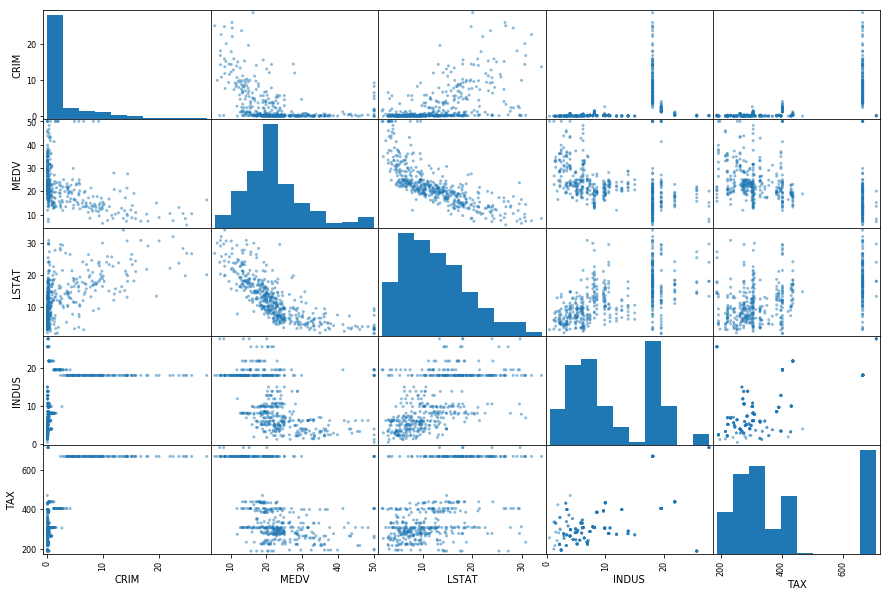

In [23]:
visual = train.copy()
from pandas.plotting import scatter_matrix
scatter_matrix(housing[["CRIM","MEDV","LSTAT", "INDUS", "TAX"]], figsize=(15, 10))

In [15]:
corr = train.corr()
corr["MEDV"].sort_values(ascending= False)

MEDV       1.000000
RM         0.656418
ZN         0.306120
DIS        0.240228
CHAS       0.181740
RAD       -0.356519
AGE       -0.371602
NOX       -0.421578
CRIM      -0.443730
TAX       -0.447323
PTRATIO   -0.457715
INDUS     -0.478701
LSTAT     -0.754425
Name: MEDV, dtype: float64

In [16]:
ready_training = train.drop("MEDV", axis = 1)
labels = train["MEDV"].copy()

In [17]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(ready_training, labels)
lin_predictions = lin.predict(ready_training)

In [18]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(labels, lin_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)
#Moderate Erorr

4.69419508058168


In [19]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(ready_training, labels)
tree_predictions = tree_reg.predict(ready_training)
tree_mse = mean_squared_error(labels, tree_predictions)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)
#Overfiiting evident

0.0


In [20]:
from sklearn.ensemble import RandomForestRegressor
randForest = RandomForestRegressor(max_depth = 10, random_state = 42, n_estimators = 20 )
randForest.fit(ready_training, labels)
rand_predictions = randForest.predict(ready_training)
rand_mse = mean_squared_error(labels, rand_predictions)
rand_rmse = np.sqrt(rand_mse)
print(rand_rmse)
#Best performance of 3; attempt fine-tuning

1.4468493669694793


In [21]:
from sklearn.model_selection import cross_val_score

def cross_validate(regr):
    scores = cross_val_score(regr, ready_training, labels, scoring= "neg_mean_squared_error", cv = 5)
    rmse_scores = np.sqrt(-scores)
    print("Scores:" , rmse_scores)
    print("Mean:" , rmse_scores.mean())
    print("Std Dev.:" , rmse_scores.std())
cross_validate(randForest) #rand forest is our best based on cross-validation
cross_validate(lin)
cross_validate(tree_reg)

Scores: [3.78464666 3.44902814 3.37663126 2.88948923 4.76237658]
Mean: 3.6524343730222717
Std Dev.: 0.624336211893122
Scores: [5.71974202 4.93144637 3.92260369 3.84163602 6.54592192]
Mean: 4.9922700046151895
Std Dev.: 1.040662667254093
Scores: [3.84586244 4.54302396 3.85287771 3.08449888 4.95440545]
Mean: 4.05613368655278
Std Dev.: 0.6439806641189858


In [22]:
from sklearn.model_selection import GridSearchCV

params = [
    {'n_estimators':[5, 10, 30, 50], 'max_features':[2,3,5,10,12]},
    {'bootstrap':[False], 'n_estimators':[5, 10],'max_features':[2,5,12]}
]
new_rand = RandomForestRegressor(random_state=42)
grid = GridSearchCV(new_rand, params, cv = 5, scoring = 'neg_mean_squared_error', return_train_score = True)
grid.fit(ready_training, labels)
print(grid.best_params_)

{'bootstrap': False, 'max_features': 5, 'n_estimators': 10}


c:\users\hcars\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [36]:
end_model = RandomForestRegressor(max_depth = 10, random_state = 42, n_estimators = 10, max_features = 5, bootstrap = False )
end_model.fit(ready_training, labels)
end_predictions = end_model.predict(test)
end_mse = mean_squared_error(test_labels, end_predictions)
end_rmse = np.sqrt(end_mse)
#print(end_rmse)
#Final rmse looking good